# Data Analysis Project

### The dataset I analyzed is the titanic dataset (https://www.kaggle.com/c/titanic/data). Moreover, I will investigate the correlation between the “features” like passengers’ gender and class and passengers' survival rate.

In [4]:
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.describe()

/Users/chiyingqiu/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### From the table above, it looks wired that the minimum age of passengers is 0.42. I am goting to check if there are missing variables around.

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### It is clear that there are plenty missing values in the column 'Age', I will then drop these missing values to see the distribution of passengers' age in this dataset. In addition, I would not touch column 'Cabin' and column 'Embarked' since these two columns are not in my investigation.

In [27]:
import numpy as np
titanic_df['Age'].replace('', np.nan, inplace=True)
titanic_df.dropna(subset=['Age'], inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


### Plotting the distribution of age

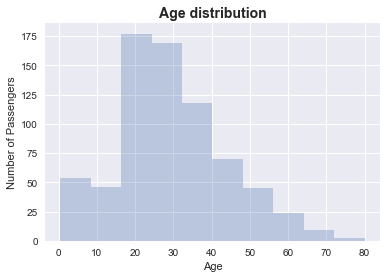

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(titanic_df.Age, alpha=.3)
plt.title('Age distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


### The distribution is fair and clear to me.

## Question One

### According to James Cameron's film, a great number of lifeboats were given to women. So I would like to see if the dateset would provide evidence to support the film.




In [51]:
titanic_df1 = pd.read_csv('titanic_data.csv')
titanic_df1.describe()
titanic_df1.head()

/Users/chiyingqiu/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### I am going to compare gender ratio of passengers on borad to sex ration of survived people

Sex
female    314
male      577
Name: PassengerId, dtype: int64


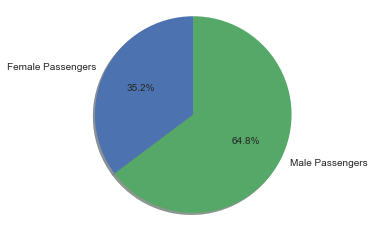

In [100]:
gender_ratio = titanic_df1.groupby('Sex').count()['PassengerId']
print (gender_ratio)
labels = 'Female Passengers', 'Male Passengers'
sizes = [314, 577]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

Sex
female    233
male      109
Name: Survived, dtype: int64


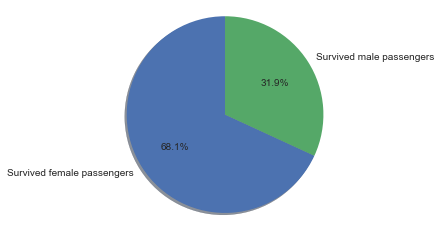

In [102]:
ratio = titanic_df1.groupby('Sex').sum()['Survived']
print (ratio)
labels = 'Survived female passengers', 'Survived male passengers'
sizes = [233, 109]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()


### Conclusion: although there were more male passengers than female passengers,  the number of survied women is much bigger than the number of survived men. Therefore, gender might play an important role in whether or not a passenger would survive.

## Question Two

### The data description said that the ticket type might provide information about passengers' socio-economic status. So I was wondering that if there are correlations between social classes and whether or not they survived.


In [99]:
social_class_status = titanic_df1.groupby('Pclass').count()['PassengerId']
print (social_class_status)



Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Populating the interactive namespace from numpy and matplotlib


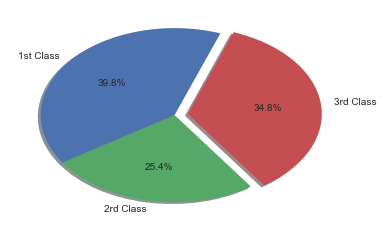

In [109]:
social_class_status_survival = titanic_df1.groupby('Pclass').sum()['Survived']
print (social_class_status_survival)

%pylab inline
labels = '1st Class', '2rd Class', '3rd Class'
sizes = [136, 87, 119]
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=70)
plt.show()

### Conclusion: from the data and pie chart above, there is no clear evidence that the social class statue will affect survival rate.

## Question Three

### Here, with provided information, I would like to test whether the number of each passenger's relatives would affect whether or not they survived.



### To make life easier, I sum up the # of siblings / spouses aboard the Titanic and of parents / children aboard the Titanic. And create a new column called Fumber。

In [107]:
total_number_of_family = titanic_df1['SibSp'].add(titanic_df1['Parch'].shift(), fill_value = 0)
titanic_df1['Fumber'] = total_number_of_family
fumber_survivals = titanic_df1.groupby('Fumber').sum()['Survived']
print (fumber_survivals)

Fumber
0.0    152
1.0    122
2.0     49
3.0     11
4.0      7
5.0      0
6.0      1
7.0      0
8.0      0
9.0      0
Name: Survived, dtype: int64


Populating the interactive namespace from numpy and matplotlib


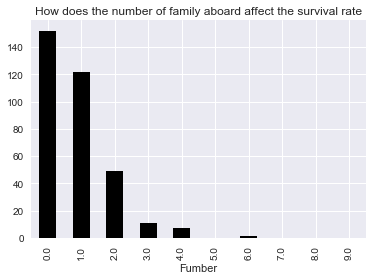

In [110]:
%pylab inline
fumber_survivals.plot(kind='bar', color = 'k', title = ('How does the number of family aboard affect the survival rate'))

### Conclusion: we can see that there is a negative correlation between survival rate and number of relatives abroad.

## Summary
### According to my investigation, the number of survived female passengers are almost two times larger than the survived male passengers, while the total number of women aboard is only as half as the number of men aboard. This might suggest that gender plays an important role in deciding whether or not a passenger survived the sinking of the Titanic. 

### Secondly, there is no evident correlation to support that socio-economic status (SES) plays an essential effect on the Disaster. 

### Finally, I find a negative correlation between the number of a person's relatives aboard and his survival rate. For passengers who have over five relatives on board, there is almost no survived passengers. For passengers who have less than three relatives on board the highest survival rate is among the passengers with one or two families on board. 

## Limitation
### I have to admit that the investigation I have done so far are correlations rather than causations. I need more diverse variables to do further investigation.

### Although I find a negative correlation between the number of a person's relatives aboard and his survival rate, a more specific result is desired. It would be more convincing if the data would provide a detailed family relationships among the passengers. 

### Finally, I suppose that the organization and distribution of lifeboats are mainly charged by the crew on borad. Unfortunately, the data does not provide any information about the crew. It would be fantastic if I could carry on this investigation with data such as the background of crew and the survival rate of crew.
